In [1]:
from rdflib import Graph, Namespace
from rdflib.plugins.sparql import prepareQuery

In [3]:
# Load the RDF file
g = Graph()
g.parse("LBD files/settings1HasGeo/outputIFCStudyWalls.ifc.ttl")

<Graph identifier=N178c4b1864924258b71ed315f9fa86b8 (<class 'rdflib.graph.Graph'>)>

In [4]:
# Define namespaces
ns1 = Namespace("https://linkedbuildingdata.org/LBD#")
ns2 = Namespace("http://lbd.arch.rwth-aachen.de/props#")
ns3 = Namespace("https://w3id.org/fog#")
ns4 = Namespace("https://w3id.org/omg#")
ns5 = Namespace("https://w3id.org/bot#")
owl = Namespace("http://www.w3.org/2002/07/owl#")
rdfs = Namespace("http://www.w3.org/2000/01/rdf-schema#")

In [5]:
# Define the SPARQL query
query = prepareQuery("""
    SELECT ?wall ?xmax ?xmin ?ymax ?ymin ?zmax ?zmin
    WHERE {
        ?wall a <https://pi.pauwel.be/voc/buildingelement#Wall> ;
              ns4:hasGeometry ?geometry .
        ?geometry ns1:hasBoundingBox ?bbox .
        ?bbox ns1:x-max ?xmax ;
              ns1:x-min ?xmin ;
              ns1:y-max ?ymax ;
              ns1:y-min ?ymin ;
              ns1:z-max ?zmax ;
              ns1:z-min ?zmin .
    }
""", initNs={"ns1": ns1, "ns2": ns2, "ns3": ns3, "ns4": ns4, "ns5": ns5})


In [6]:
# Execute the query
results = g.query(query)


In [7]:
# Print the results
for row in results:
    print(f"Wall: {row['wall']}")
    print(f"Bounding Box:")
    print(f"  x-max: {row['xmax']}")
    print(f"  x-min: {row['xmin']}")
    print(f"  y-max: {row['ymax']}")
    print(f"  y-min: {row['ymin']}")
    print(f"  z-max: {row['zmax']}")
    print(f"  z-min: {row['zmin']}")
    print()

Wall: https://example.domain.de/wall_24e0442d-7941-43df-9a5d-c0ef934d5925
Bounding Box:
  x-max: -31.356024002139364^^http://www.w3.org/2001/XMLSchema#double
  x-min: -80.35602400213936^^http://www.w3.org/2001/XMLSchema#double
  y-max: -31.37121527709601^^http://www.w3.org/2001/XMLSchema#double
  y-min: -32.371215277096006^^http://www.w3.org/2001/XMLSchema#double
  z-max: 20.0^^http://www.w3.org/2001/XMLSchema#double
  z-min: 0.0^^http://www.w3.org/2001/XMLSchema#double

Wall: https://example.domain.de/wall_24e0442d-7941-43df-9a5d-c0ef934d5952
Bounding Box:
  x-max: 56.643975997860686^^http://www.w3.org/2001/XMLSchema#double
  x-min: -31.35602400213933^^http://www.w3.org/2001/XMLSchema#double
  y-max: 3.552713678800501E-15^^http://www.w3.org/2001/XMLSchema#double
  y-min: -0.9999999999999964^^http://www.w3.org/2001/XMLSchema#double
  z-max: 20.0^^http://www.w3.org/2001/XMLSchema#double
  z-min: 0.0^^http://www.w3.org/2001/XMLSchema#double

Wall: https://example.domain.de/wall_24e0442d-

In [13]:
from shapely.geometry import Polygon
import re

In [14]:
# Function to extract numerical value from RDF literal
def extract_numerical_value(literal):
    match = re.match(r"[-+]?\d*\.\d+|\d+", literal)
    if match:
        return float(match.group())
    else:
        return None

In [15]:
# Initialize a list to store the coordinates of the building's boundary
boundary_points = []

In [16]:
# Iterate over the walls to extract their coordinates
for row in results:
    # Extract numerical values from RDF literals
    x_max = extract_numerical_value(row['xmax'])
    x_min = extract_numerical_value(row['xmin'])
    y_max = extract_numerical_value(row['ymax'])
    y_min = extract_numerical_value(row['ymin'])
    
    # Check if any value extraction failed
    if None in [x_max, x_min, y_max, y_min]:
        print("Error: Failed to extract numerical values from RDF literals.")
        continue
    
    # Add the corner points of the bounding box to the boundary list
    boundary_points.append((x_min, y_min))
    boundary_points.append((x_max, y_min))
    boundary_points.append((x_max, y_max))
    boundary_points.append((x_min, y_max))

In [17]:
# Create a Shapely Polygon from the boundary points
building_polygon = Polygon(boundary_points)

In [18]:
# Calculate the area and perimeter of the building
area = building_polygon.area
perimeter = building_polygon.length

In [19]:
# Print the results
print(f"Area of the Building: {area}")
print(f"Perimeter of the Building: {perimeter}")

Area of the Building: 5150.503591086777
Perimeter of the Building: 1694.7833423326067


In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


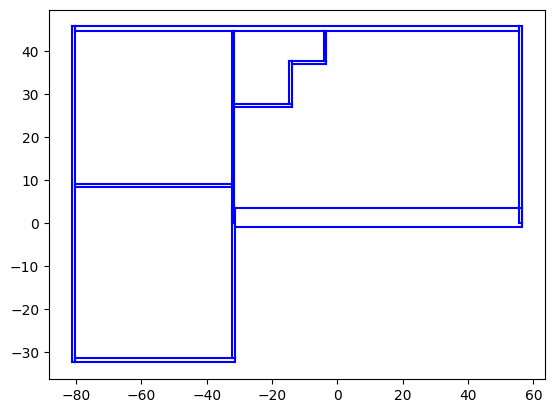

In [21]:
# Plot the walls
for row in results:
    x_max = extract_numerical_value(row['xmax'])
    x_min = extract_numerical_value(row['xmin'])
    y_max = extract_numerical_value(row['ymax'])
    y_min = extract_numerical_value(row['ymin'])
    
    plt.plot([x_min, x_max], [y_min, y_min], color='blue')  # Bottom side of the wall
    plt.plot([x_max, x_max], [y_min, y_max], color='blue')  # Right side of the wall
    plt.plot([x_min, x_max], [y_max, y_max], color='blue')  # Top side of the wall
    plt.plot([x_min, x_min], [y_min, y_max], color='blue')  # Left side of the wall

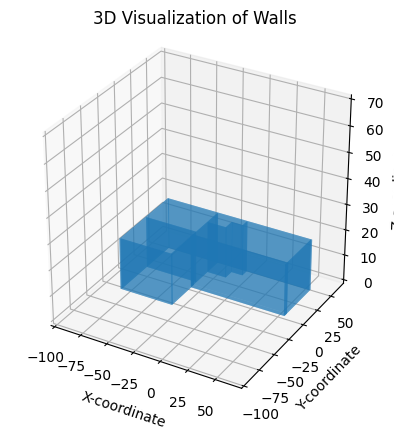

: 

In [45]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the walls
for row in results:
    x_max = extract_numerical_value(row['xmax'])
    x_min = extract_numerical_value(row['xmin'])
    y_max = extract_numerical_value(row['ymax'])
    y_min = extract_numerical_value(row['ymin'])
    z_max = extract_numerical_value(row['zmax'])
    z_min = extract_numerical_value(row['zmin'])

    # Define vertices for the walls
    vertices = [
        [x_min, y_min, z_min],
        [x_max, y_min, z_min],
        [x_max, y_max, z_min],
        [x_min, y_max, z_min],
        [x_min, y_min, z_max],
        [x_max, y_min, z_max],
        [x_max, y_max, z_max],
        [x_min, y_max, z_max]
    ]
    
    # Define the faces of the walls
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],  # Bottom face
        [vertices[4], vertices[5], vertices[6], vertices[7]],  # Top face
        [vertices[0], vertices[1], vertices[5], vertices[4]],  # Side face 1
        [vertices[1], vertices[2], vertices[6], vertices[5]],  # Side face 2
        [vertices[2], vertices[3], vertices[7], vertices[6]],  # Side face 3
        [vertices[3], vertices[0], vertices[4], vertices[7]]   # Side face 4
    ]
    
    # Plot each face
    for face in faces:
        polygon = Poly3DCollection([face], alpha=0.5)
        ax.add_collection3d(polygon)

# Set labels and title
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.set_zlabel('Z-coordinate')
ax.set_title('3D Visualization of Walls')

# Set equal aspect ratio for all axes
ax.set_box_aspect([1,1,1])

# Set the limits for each axis
ax.set_xlim(-100, 70)
ax.set_ylim(-100, 70)
ax.set_zlim(0, 70)

# Show plot
plt.show()
